#Loading Important Libs


In [1]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
print(os.getcwd())
from zipfile import ZipFile 


c:\Users\thaqi\Desktop\PRJ\Latex_OCR


  # DATA LOADING
  Data is from the HASY dataset



In [5]:
classes = {}

import csv


with open('data/symbols.csv') as csv_file:
  csv_reader = csv.reader(csv_file,delimiter=',')
  line_count = 0
  next(csv_reader)
  for row in csv_reader:
    classes[int(row[0])] = str(row[1])

print(classes)

{31: 'A', 32: 'B', 33: 'C', 34: 'D', 35: 'E', 36: 'F', 37: 'G', 38: 'H', 39: 'I', 40: 'J', 41: 'K', 42: 'L', 43: 'M', 44: 'N', 45: 'O', 46: 'P', 47: 'Q', 48: 'R', 49: 'S', 50: 'T', 51: 'U', 52: 'V', 53: 'W', 54: 'X', 55: 'Y', 56: 'Z', 59: '\\rightarrow', 70: '0', 71: '1', 72: '2', 73: '3', 74: '4', 75: '5', 76: '6', 77: '7', 78: '8', 79: '9', 81: '\\pi', 82: '\\alpha', 87: '\\beta', 88: '\\sum', 89: '\\sigma', 90: 'a', 91: 'b', 92: 'c', 93: 'd', 94: 'e', 95: 'f', 96: 'g', 97: 'h', 98: 'i', 99: 'j', 100: 'k', 101: 'l', 102: 'm', 103: 'n', 104: 'o', 105: 'p', 106: 'q', 107: 'r', 108: 's', 110: 'u', 111: 'v', 112: 'w', 113: 'x', 114: 'y', 115: 'z', 116: '\\Sigma', 117: '\\gamma', 150: '\\Gamma', 151: '\\delta', 152: '\\Delta', 153: '\\zeta', 154: '\\eta', 155: '\\theta', 156: '\\Theta', 157: '\\epsilon', 158: '\\varepsilon', 159: '\\iota', 160: '\\kappa', 161: '\\varkappa', 162: '\\lambda', 163: '\\Lambda', 164: '\\mu', 165: '\\nu', 166: '\\xi', 167: '\\Xi', 168: '\\Pi', 169: '\\rho', 170

Training and Validation datasets

In [6]:
curr_dir = os.getcwd()
train_dir = os.path.join(curr_dir, 'data/Train')
val_dir = os.path.join(curr_dir, 'data/Validation')

print(len(os.listdir(train_dir))) #No. of classes

369


# Data Augmentation

Applying random filters to the data to avoid overfitting. 


In [7]:
batch_size = 100
IMG_SHAPE = 32 #All images in dataset are 32x32

image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 151241 images belonging to 369 classes.


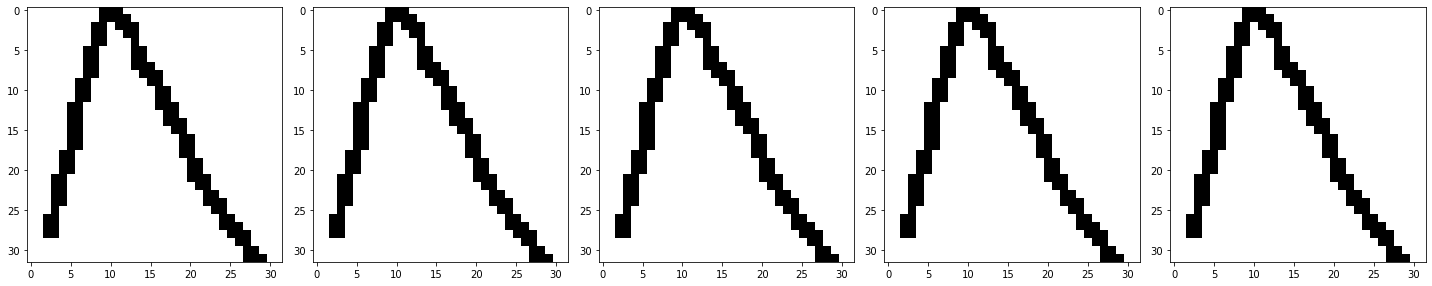

In [8]:
 #Plotting images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img in images_arr:
      for ax in axes:
        ax.imshow(img)
      
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][4] for i in range(5)]
plotImages(augmented_images)

More filters 

In [9]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )


Found 151241 images belonging to 369 classes.


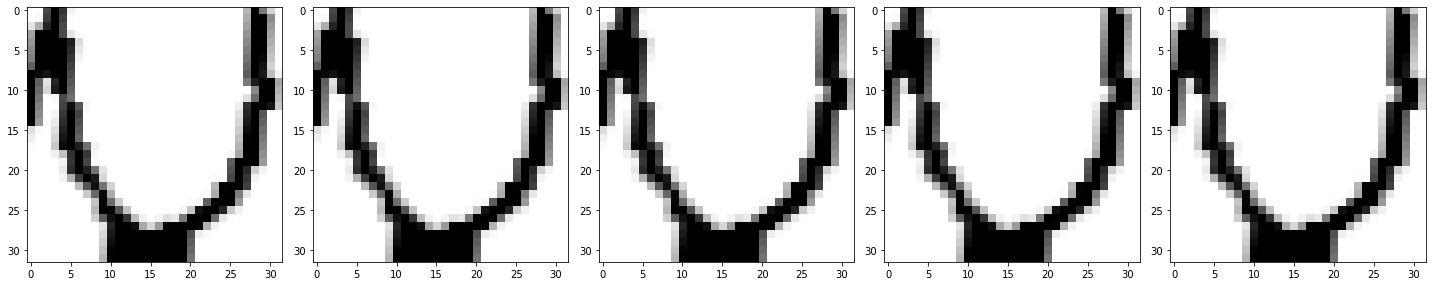

In [10]:
augmented_images = [train_data_gen[0][0][10] for i in range(5)]
plotImages(augmented_images)

In [11]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 16992 images belonging to 369 classes.


# Creating the CNN

In [12]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(369))

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
epochs = 80

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80
1513/1513 [==============================] - 688s 455ms/step - loss: 3.8698 - accuracy: 0.2009 - val_loss: 2.4744 - val_accuracy: 0.3892
Epoch 2/80
1513/1513 [==============================] - 324s 214ms/step - loss: 2.7556 - accuracy: 0.3611 - val_loss: 1.7247 - val_accuracy: 0.5389
Epoch 3/80
1513/1513 [==============================] - 533s 352ms/step - loss: 2.4233 - accuracy: 0.4165 - val_loss: 1.6114 - val_accuracy: 0.5560
Epoch 4/80
1513/1513 [==============================] - 411s 272ms/step - loss: 2.2535 - accuracy: 0.4468 - val_loss: 1.5477 - val_accuracy: 0.5773
Epoch 5/80
1513/1513 [==============================] - 432s 286ms/step - loss: 2.1467 - accuracy: 0.4663 - val_loss: 1.4756 - val_accuracy: 0.5912
Epoch 6/80
1513/1513 [==============================] - 301s 199ms/step - loss: 2.0608 - accuracy: 0.4835 - val_loss: 1.4636 - val_accuracy: 0.5897
Epoch 7/80
1513/1513 [==============

In [15]:
model.save('savedModel/1/my_model') 
model.save('savedModel/my_model.h5') 


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: savedModel/1/my_model\assets


In [16]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


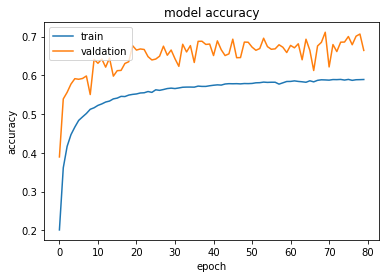

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valdation'], loc='upper left')
plt.show()

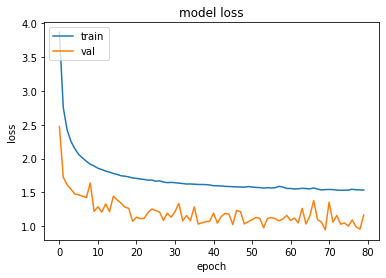

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()